# Fase 1: Detección del problema

### Contexto:

Este dataset contiene información sobre tumores mamarios obtenida mediante imágenes digitales de células. El objetivo es **predecir si un tumor es benigno o maligno basándose en ciertas características de las células**.

### Definición del problema:

Queremos construir un modelo de clasificación que, dado un conjunto de características de un tumor, pueda **predecir si es benigno o maligno**. Este tipo de modelo es muy relevante en el ámbito médico, ya que un diagnóstico oportuno y preciso puede salvar vidas.

### Métrica de éxito:

Dado que se trata de un problema médico, es fundamental **minimizar los falsos negativos**, es decir, casos en los que el modelo no identifica correctamente un tumor maligno. Por tanto, además de la precisión general, **se evaluarán métricas como el recall y el F1-Score.**

# Fase 2: Extracción y Limpieza de Datos

### Extracción de datos:
- El dataset se carga directamente desde sklearn, y se crea un DataFrame para facilitar su manipulación.

### Limpieza de datos:
- Se revisan los valores nulos o faltantes.
- Se verifica la distribución de las clases de la variable objetivo para entender si el dataset está balanceado.

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target # data['target']

In [130]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [131]:
X = df.drop(columns='target')
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [132]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [6]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Fase 3: Análisis Exploratorio de Datos (30 minutos)

### Visualización de la distribución de las características:
Se generan histogramas para las principales características del dataset con el fin de observar su distribución y posibles valores atípicos.

### Correlación entre variables:
Se calcula la matriz de correlación entre todas las variables del dataset. Esto permite identificar:

### Características que están altamente correlacionadas entre sí, lo que podría llevar a problemas de multicolinealidad.
Características que tienen mayor correlación con la variable objetivo, lo que podría indicar su relevancia para el modelo.

Discusión de insights:
El equipo debe discutir qué características parecen ser más relevantes para predecir si un tumor es maligno o benigno. Algunas preguntas guía:

¿Qué características muestran distribuciones más diferenciadas entre tumores malignos y benignos?
¿Existen patrones claros en los datos que puedan ser utilizados por el modelo?

In [9]:
numeric_df = df.select_dtypes(include=['number']).drop(columns='target')
numeric_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [10]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


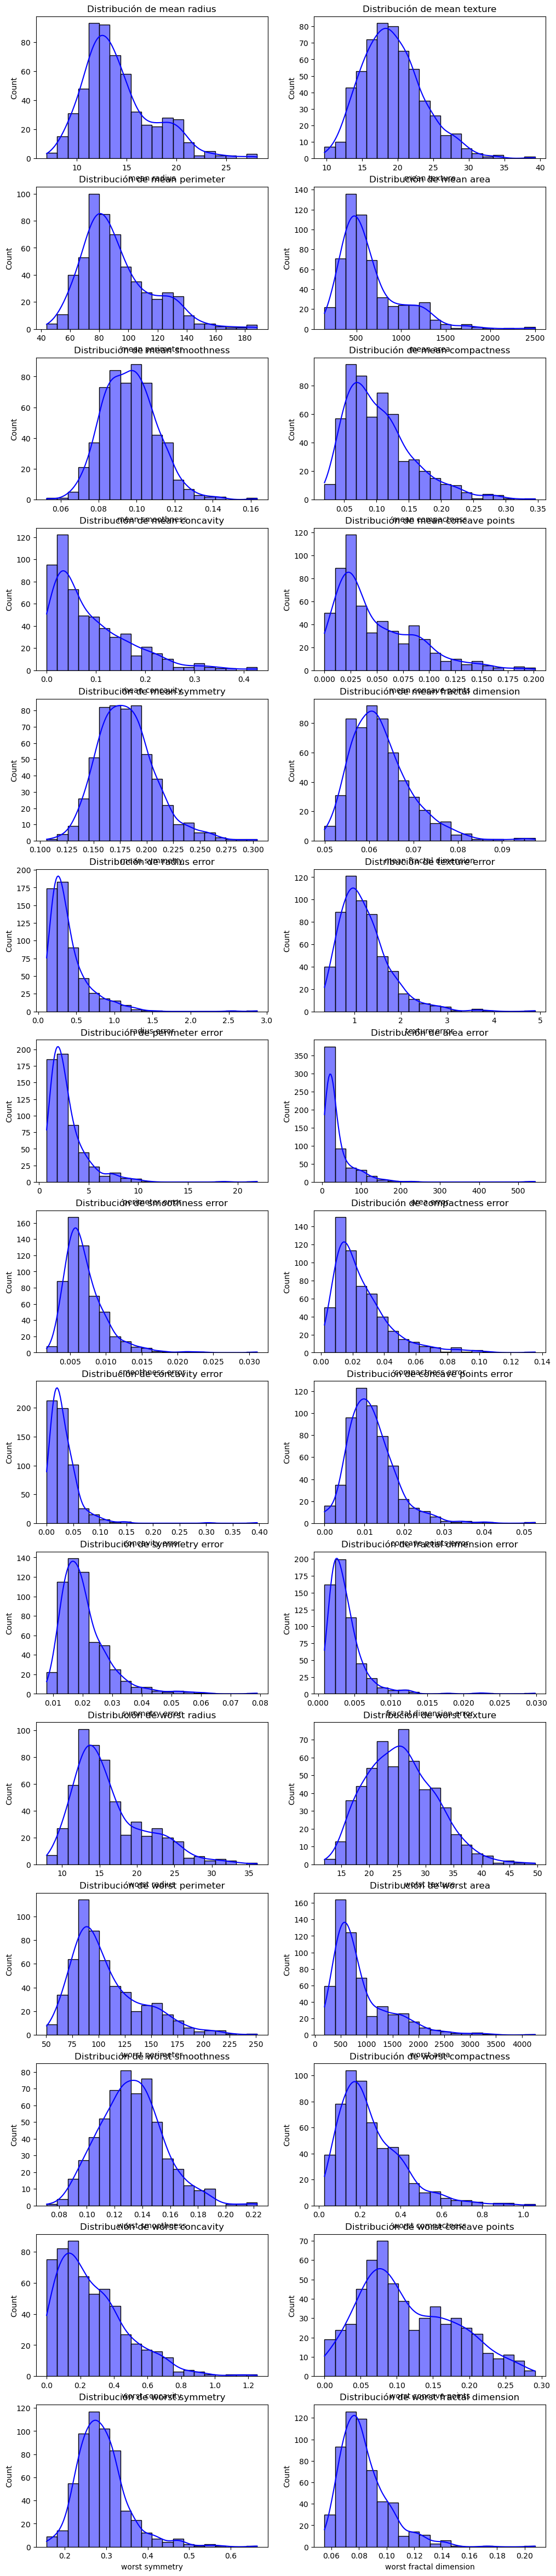

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aumentar el tamaño de la cuadrícula
num_cols = len(numeric_df.columns)
rows = (num_cols // 2) + (num_cols % 2 > 0)  # Calcula el número de filas necesario

plt.figure(figsize=(12, rows * 4))  # Ajusta el tamaño general de la figura
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(rows, 2, i)  # Ajusta filas y columnas dinámicamente
    sns.histplot(numeric_df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribución de {col}')

plt.show()

In [12]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((398, 30), (171, 30))

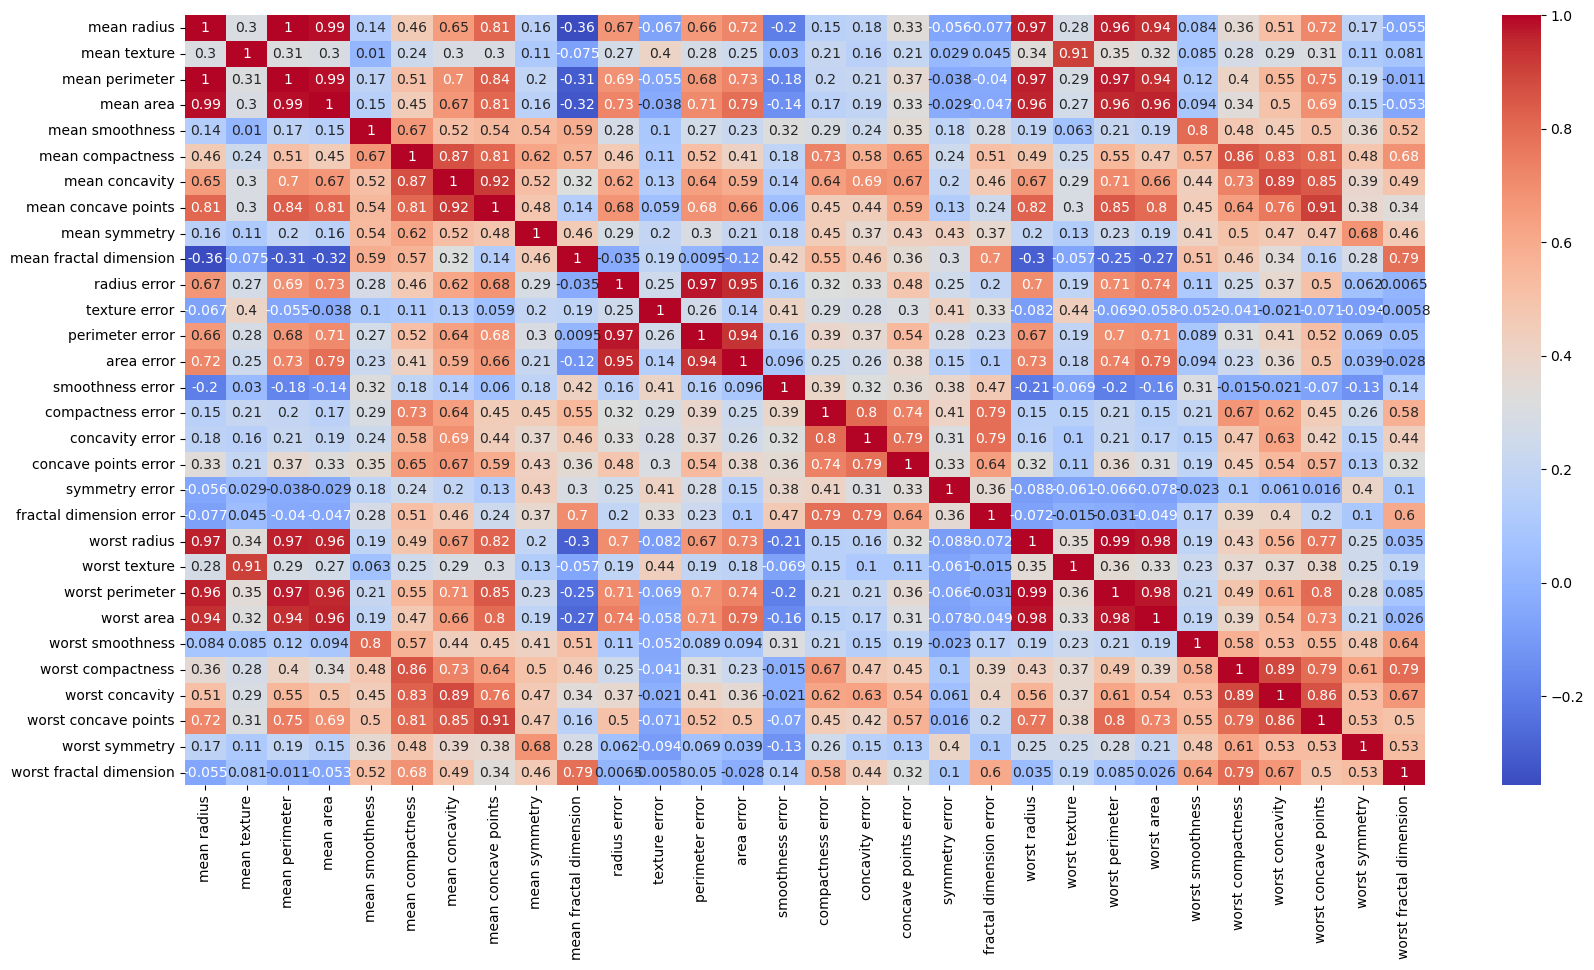

In [14]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [15]:
X_train.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.304231,0.997852,0.986512,0.136103,0.457127,0.654620,0.811418,0.162263,-0.357312,...,0.967929,0.281395,0.963948,0.941101,0.084000,0.360294,0.513258,0.716764,0.173470,-0.055387
mean texture,0.304231,1.000000,0.311321,0.297186,0.009986,0.240497,0.297140,0.296437,0.110906,-0.075108,...,0.336194,0.905251,0.347047,0.323267,0.085070,0.277202,0.289704,0.307926,0.109941,0.080590
mean perimeter,0.997852,0.311321,1.000000,0.986063,0.173230,0.509227,0.695139,0.840800,0.196485,-0.309189,...,0.967844,0.288195,0.969469,0.941998,0.115155,0.404053,0.552025,0.745526,0.194465,-0.011397
mean area,0.986512,0.297186,0.986063,1.000000,0.149533,0.452539,0.666760,0.813122,0.162577,-0.323431,...,0.958754,0.267217,0.955825,0.958972,0.094222,0.339188,0.499420,0.694462,0.146670,-0.053357
mean smoothness,0.136103,0.009986,0.173230,0.149533,1.000000,0.667714,0.518482,0.543794,0.536178,0.589552,...,0.185979,0.063056,0.212390,0.185758,0.801666,0.479688,0.449858,0.503223,0.364835,0.523257
mean compactness,0.457127,0.240497,0.509227,0.452539,0.667714,1.000000,0.870975,0.812297,0.621835,0.565259,...,0.489156,0.248877,0.548307,0.467568,0.566302,0.860437,0.825427,0.805967,0.482526,0.681995
mean concavity,0.654620,0.297140,0.695139,0.666760,0.518482,0.870975,1.000000,0.919016,0.519625,0.321337,...,0.665471,0.293236,0.709193,0.658096,0.437524,0.729719,0.885436,0.849624,0.385528,0.491768
mean concave points,0.811418,0.296437,0.840800,0.813122,0.543794,0.812297,0.919016,1.000000,0.481845,0.135781,...,0.821852,0.298627,0.849187,0.803754,0.445638,0.641887,0.763281,0.907002,0.378018,0.337097
mean symmetry,0.162263,0.110906,0.196485,0.162577,0.536178,0.621835,0.519625,0.481845,1.000000,0.458154,...,0.198148,0.133300,0.232767,0.186166,0.413800,0.500870,0.469112,0.472662,0.679084,0.460556
mean fractal dimension,-0.357312,-0.075108,-0.309189,-0.323431,0.589552,0.565259,0.321337,0.135781,0.458154,1.000000,...,-0.298989,-0.056594,-0.250954,-0.271651,0.508305,0.457253,0.339413,0.162477,0.278788,0.785852


In [16]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                #print(corr_matrix.iloc[i, j])
    return col_corr

In [17]:
#corr_features = correlation(X_train, 0.85)
#len(set(corr_features))

In [18]:
#type(corr_features)

In [19]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [20]:
#X_train = X_train.drop(corr_features,axis=1)
#X_test= X_test.drop(corr_features,axis=1)

In [21]:
len(X_train.columns)

30

C:\Users\anala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


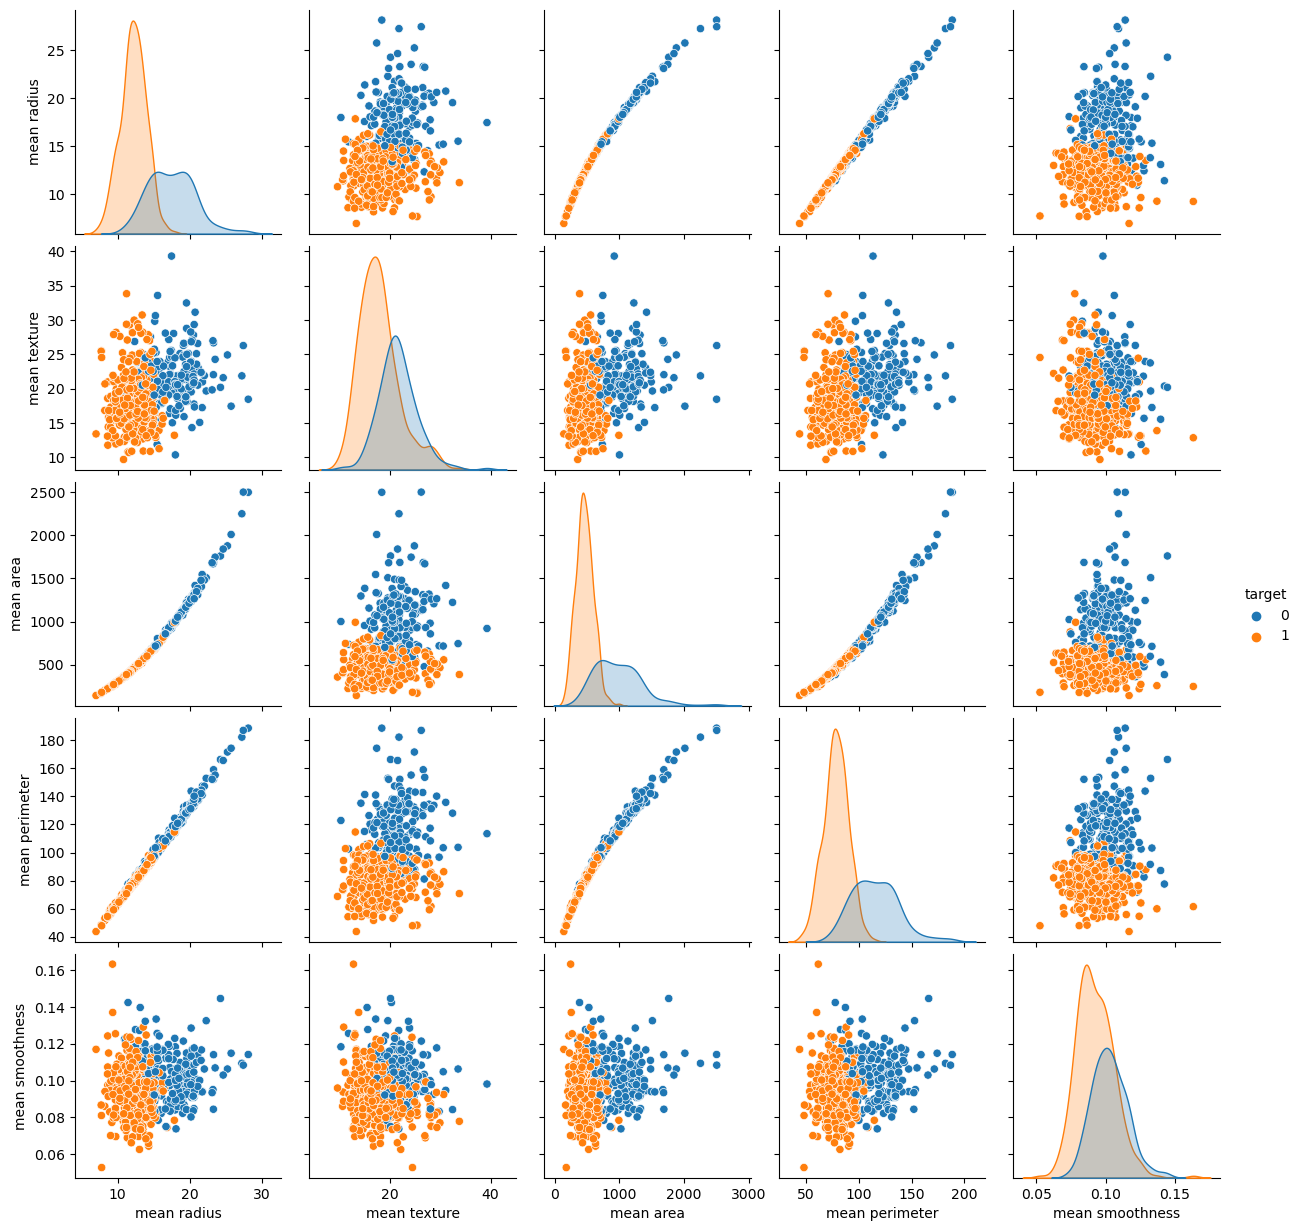

In [22]:
sns.pairplot(df, hue = 'target', vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

C:\Users\anala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


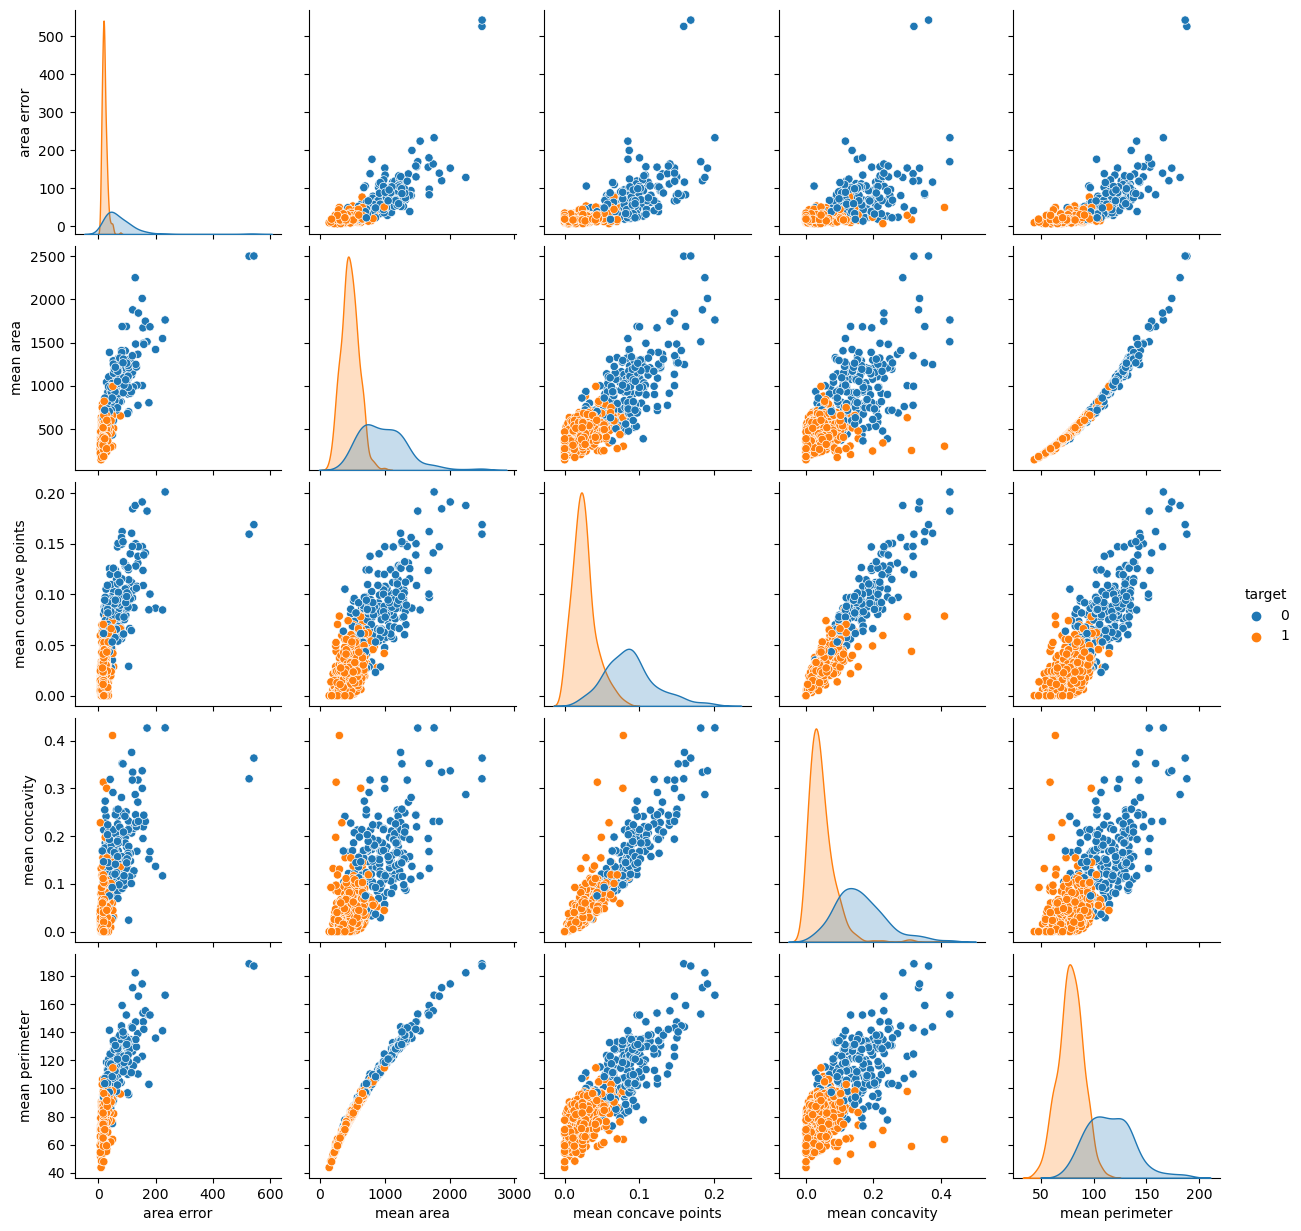

In [23]:
sns.pairplot(df, hue = 'target', vars= ['area error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter'])

# Fase 4: Entrenamiento del modelo con validación cruzada (30 minutos)
### División del dataset:
El dataset se divide en entrenamiento y prueba, asegurando que el modelo se entrene con un 70% de los datos y se evalúe con el 30% restante.

### Validación cruzada:
Antes de evaluar el modelo final, se aplica cross-validation para obtener una estimación más precisa del rendimiento del modelo. La validación cruzada divide los datos en múltiples subconjuntos y entrena el modelo en cada uno de ellos, lo que reduce el riesgo de sobreajuste y proporciona una evaluación más robusta.

### Discusión:
El equipo debe discutir por qué la validación cruzada es importante, especialmente en este tipo de problemas donde el rendimiento del modelo puede variar dependiendo del conjunto de datos con el que se entrene.

In [4]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier

In [178]:
# list of models
models = [LogisticRegression(max_iter=1000, random_state=42), SVC(kernel='linear', random_state=42), KNeighborsClassifier(), RandomForestClassifier(random_state=42), SVC(random_state=42)]

In [179]:
cms = []

In [180]:
def compare_models_train_test():
    for model in models:
        # training the model
        model.fit(X_train, y_train)
        # evaluating the model
        test_data_prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, test_data_prediction)
        cms.append(confusion_matrix(y_test, test_data_prediction))
        print('Accuracy score of the ', model, ' = ', accuracy)

In [181]:
compare_models_train_test()

C:\Users\anala\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of the  LogisticRegression(max_iter=1000, random_state=42)  =  0.9766081871345029
Accuracy score of the  SVC(kernel='linear', random_state=42)  =  0.9649122807017544
Accuracy score of the  KNeighborsClassifier()  =  0.9590643274853801
Accuracy score of the  RandomForestClassifier(random_state=42)  =  0.9707602339181286
Accuracy score of the  SVC(random_state=42)  =  0.935672514619883


In [182]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

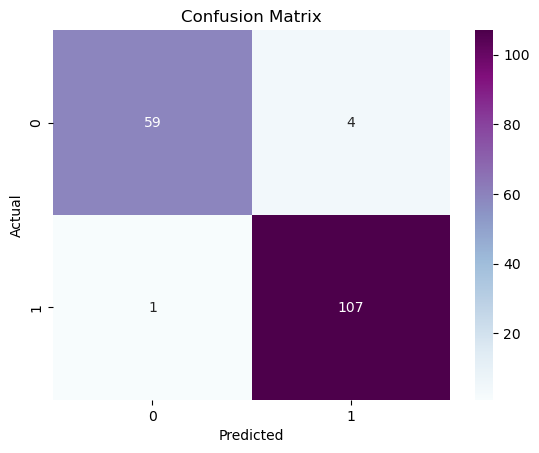

In [183]:
test_data_prediction = rf_model.predict(X_test)
cm = confusion_matrix(y_test, test_data_prediction)
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [184]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


In [185]:
# Crear el modelo con los mejores parámetros
optimized_rf_model = RandomForestClassifier(
    n_estimators=200,       # Mejor número de árboles
    min_samples_split=2,    # Tamaño mínimo para dividir un nodo
    min_samples_leaf=1,     # Tamaño mínimo de una hoja
    max_depth=None,           # Profundidad máxima de los árboles
    bootstrap=True,        # Sin muestreo con reemplazo
    random_state=42         # Semilla para reproducibilidad
)

In [186]:
optimized_rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [187]:
# Predicciones
y_pred_optimized = optimized_rf_model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_optimized)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



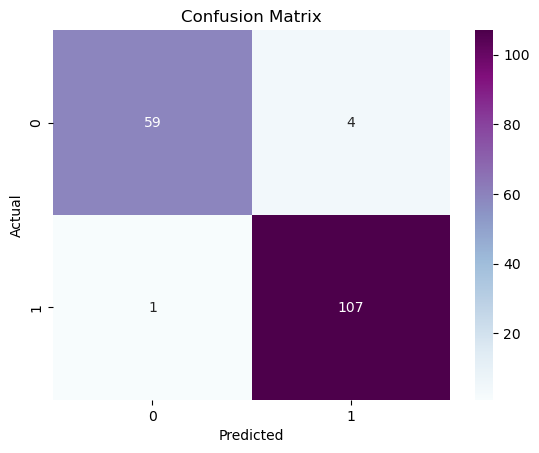

In [74]:
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [75]:
accuracy_score(y_test, y_pred_optimized)

0.9707602339181286

In [188]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo de muestras en una hoja
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Ajustar peso de las clases
    'bootstrap': [True, False]        # Si se seleccionan muestras con reemplazo
}

In [189]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',  # Optimizar para recall
    cv=5,              # Validación cruzada con 5 folds
    verbose=2,
    n_jobs=-1          # Usar todos los núcleos disponibles
)

In [190]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [79]:
grid.best_params_

{'bootstrap': False,
 'class_weight': None,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [80]:
grid_prediction = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



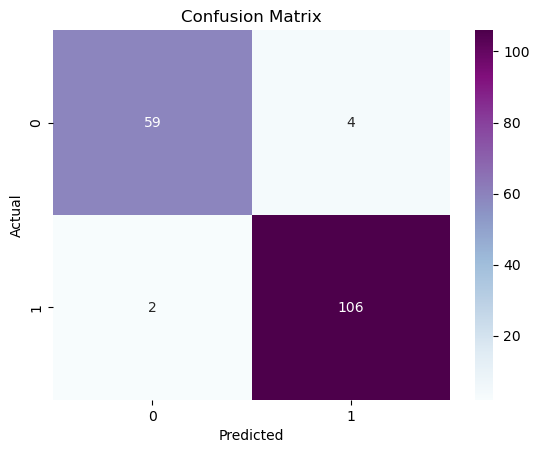

In [81]:
cm = confusion_matrix(y_test, grid_prediction)
from sklearn.metrics import confusion_matrix, classification_report

# Nueva matriz de confusión
cm_threshold = confusion_matrix(y_test, grid_prediction)

# Reporte de clasificación
print(classification_report(y_test, grid_prediction))
sns.heatmap(cm_threshold, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [82]:
accuracy_score(y_test, grid_prediction)

0.9649122807017544

# Support Vector Classifier

In [93]:
svc_model = SVC(random_state=42)

In [94]:
svc_model.fit(X_train, y_train)

SVC()

In [95]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



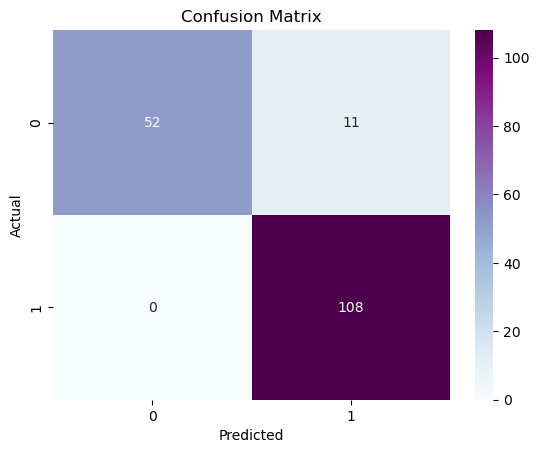

In [97]:
# Reporte de clasificación
print(classification_report(y_test, y_predict))
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
accuracy_score(y_test, y_predict)

0.935672514619883

In [191]:
#param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose= 4)

In [194]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [195]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [196]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [197]:
predic = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.97      0.92      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



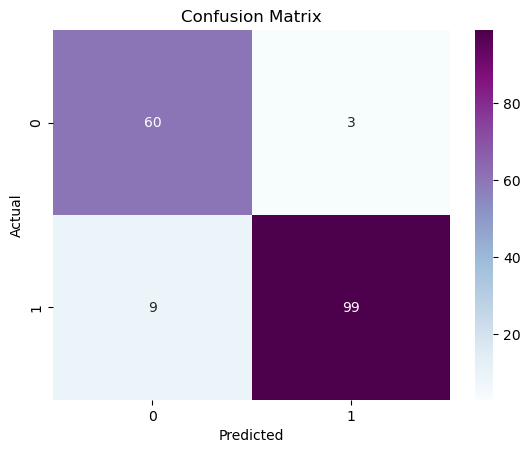

In [198]:
print(classification_report(y_test,predic))
cm = confusion_matrix(y_test, predic)
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
svc_model = SVC(kernel='linear')

In [99]:
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [100]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



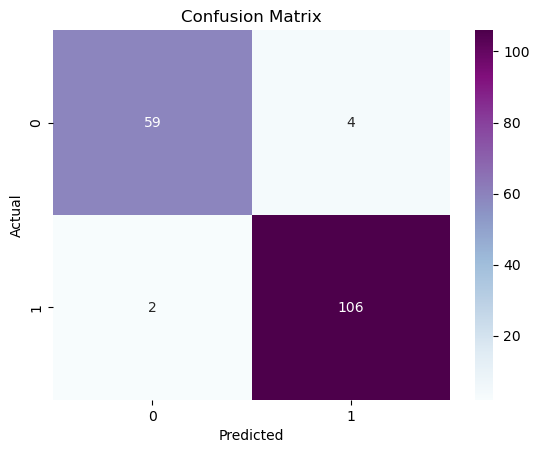

In [101]:
# Reporte de clasificación
print(classification_report(y_test, y_predict))
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='saga', max_iter=150000)
logistic.fit(X_train, y_train)
predic = logistic.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



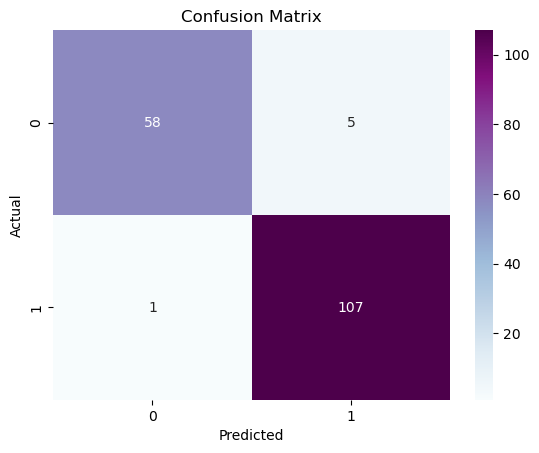

In [59]:
print(classification_report(y_test,predic))
cm = confusion_matrix(y_test, predic)
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
EGEMKLAFD

# PROBANDO

# Fase 5: Evaluación del modelo (20 minutos)
### Métricas de evaluación:
Se calculan las siguientes métricas para evaluar el modelo:

Precisión: Proporción de predicciones correctas sobre el total de predicciones realizadas.
Recall: Proporción de tumores malignos correctamente identificados.
F1-Score: Media armónica entre precisión y recall, útil cuando hay un ligero desbalanceo en las clases.
Matriz de confusión: Permite visualizar el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

### Evaluación mediante cross-validation:
Se reporta el rendimiento del modelo en cada pliegue de la validación cruzada y se obtiene el promedio de las métricas para determinar su desempeño general.

In [140]:
svc_model = SVC(random_state=42)

In [141]:
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [142]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



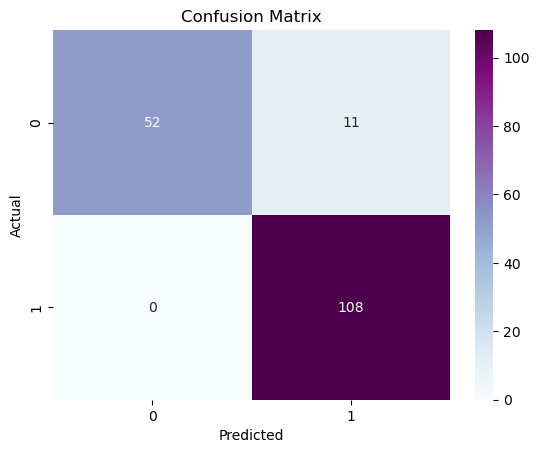

In [143]:
# Reporte de clasificación
print(classification_report(y_test, y_predict))
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [144]:
accuracy_score(y_test, y_predict)

0.935672514619883

In [145]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.935672514619883


In [126]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predict))

Precision: 0.907563025210084
Recall: 1.0


In [199]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Perform k-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Cross-validation scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean accuracy: 0.9121720229777983
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.9622784810126582


In [200]:
y_pred = grid_search.predict(X_test)

In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [205]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9707602339181286


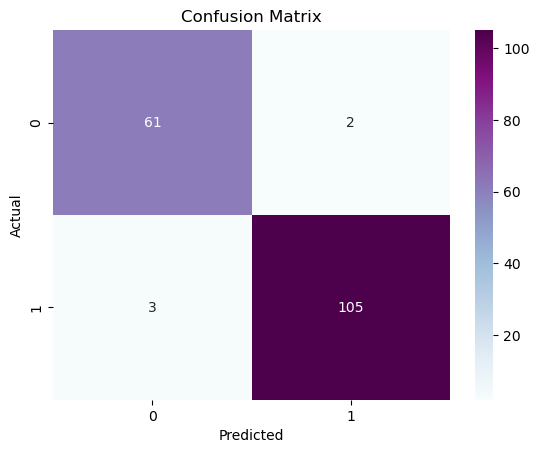

In [202]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Fase 6: Conclusiones y Despliegue (20 minutos)
### Importancia de las características:
El equipo analiza cuáles fueron las características más importantes utilizadas por el modelo para hacer la clasificación. Se observa cuáles son las más influyentes y se discute cómo estas características pueden estar relacionadas con la malignidad de los tumores.

### Conclusiones:

¿El modelo es suficientemente bueno para ser utilizado en un entorno real?
¿Qué características fueron las más relevantes en el modelo?
¿Cómo se podría mejorar el modelo? Algunas ideas podrían ser:
Probar con modelos más avanzados como Random Forest o Gradient Boosting.
Hacer un ajuste de hiperparámetros mediante búsqueda en grid (GridSearchCV).
Usar más datos o generar características adicionales mediante ingeniería de características.
Despliegue:
El equipo discute cómo este modelo podría ser desplegado en una aplicación real. Se plantea la posibilidad de integrarlo en un sistema médico de apoyo al diagnóstico, que permita a los médicos obtener una segunda opinión basada en inteligencia artificial.

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta y transforma X_train
X_test_scaled = scaler.transform(X_test)       # Solo transforma X_test

# Entrenamos el modelo SVC con los datos escalados
svc = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svc.fit(X_train_scaled, y_train)

# Realizamos predicciones y evaluamos el modelo
y_pred = svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.98


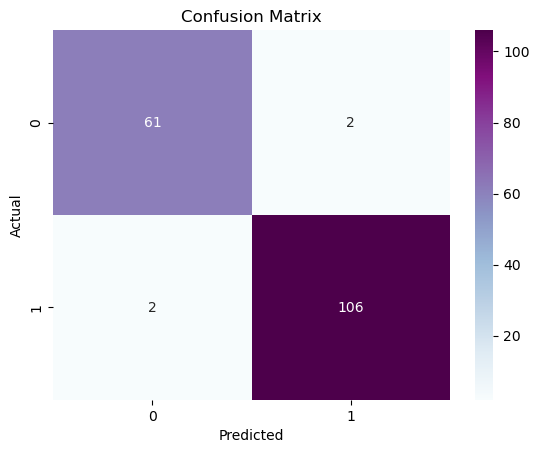

In [150]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [139]:
df.shape

(569, 31)

In [159]:
svc_model = SVC(random_state=42)

In [160]:
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [161]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



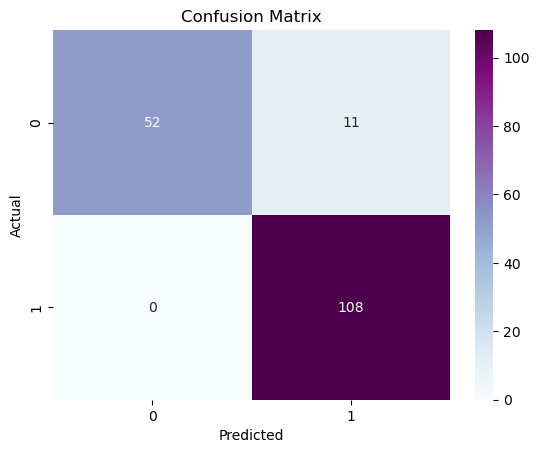

In [162]:
# Reporte de clasificación
print(classification_report(y_test, y_predict))
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [144]:
accuracy_score(y_test, y_predict)

0.935672514619883

In [163]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [164]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [165]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.2s
[CV] END ......................C=1, gamma=0.1, 

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   3.2s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   1.3s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   2.2s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   6.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   2.6s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   3.4s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   1.3s
[CV] END .................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [169]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [167]:
predic = grid.predict(X_test)

In [175]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 61   2]
 [  3 105]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



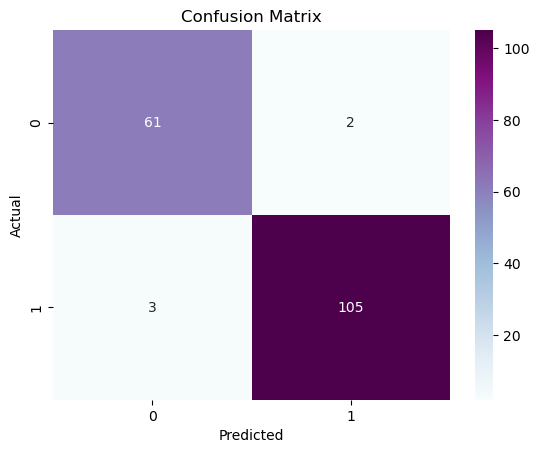

In [176]:
# Reporte de clasificación
cm= confusion_matrix(y_test, predic)
print(classification_report(y_test, predic))
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

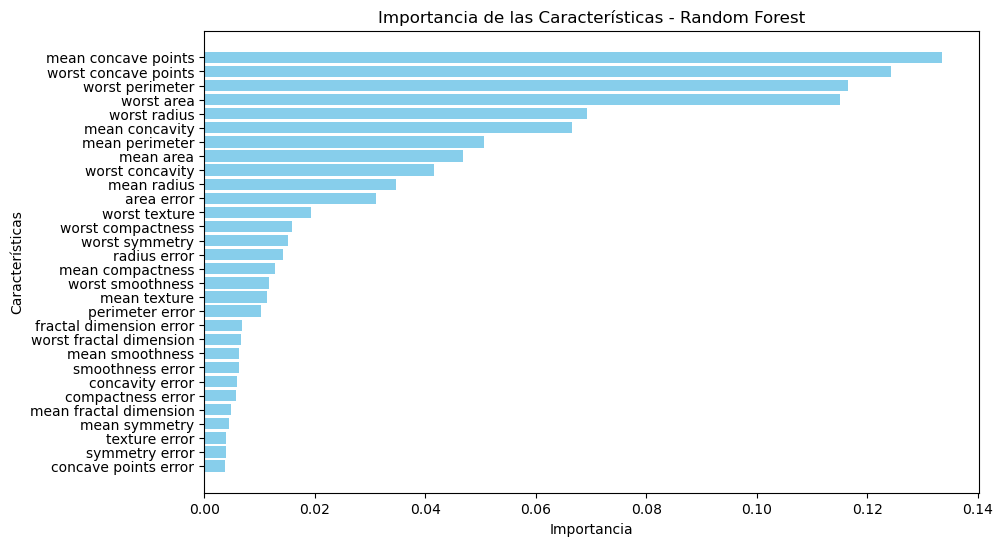

In [207]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener la importancia de las características
importances = optimized_rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Gráfica
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invertir para que la característica más importante esté arriba
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()
